<a href="https://colab.research.google.com/github/kamalzada/Python-codes/blob/main/w10_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
data = pd.concat(map(pd.read_csv, ['google-data.csv'])) 

In [ ]:
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

In [ ]:
from fbprophet import Prophet

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [ ]:
df = df[['Date', 'Close']]

In [ ]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [ ]:
df['ds'] = df['ds'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1259 non-null   datetime64[ns]
 1   y       1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [ ]:
m = Prophet(interval_width=0.95, weekly_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=100, freq='D') 
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1354,2018-04-04,1104.263236,1044.910897,1156.553034,1072.704895,1140.602106,-3.642689,-3.642689,-3.642689,2.935269,2.935269,2.935269,-6.577957,-6.577957,-6.577957,0.0,0.0,0.0,1100.620547
1355,2018-04-05,1104.934841,1049.711327,1151.533153,1072.814357,1141.814860,-5.256296,-5.256296,-5.256296,2.156286,2.156286,2.156286,-7.412582,-7.412582,-7.412582,0.0,0.0,0.0,1099.678545
1356,2018-04-06,1105.606446,1041.774146,1155.432934,1072.998644,1143.027613,-5.614998,-5.614998,-5.614998,2.561662,2.561662,2.561662,-8.176660,-8.176660,-8.176660,0.0,0.0,0.0,1099.991448
1357,2018-04-07,1106.278050,1034.165570,1145.912514,1073.182932,1144.229702,-14.894633,-14.894633,-14.894633,-6.028971,-6.028971,-6.028971,-8.865661,-8.865661,-8.865661,0.0,0.0,0.0,1091.383417
1358,2018-04-08,1106.949655,1033.916061,1146.239446,1073.367219,1145.390199,-15.505006,-15.505006,-15.505006,-6.028971,-6.028971,-6.028971,-9.476035,-9.476035,-9.476035,0.0,0.0,0.0,1091.444649


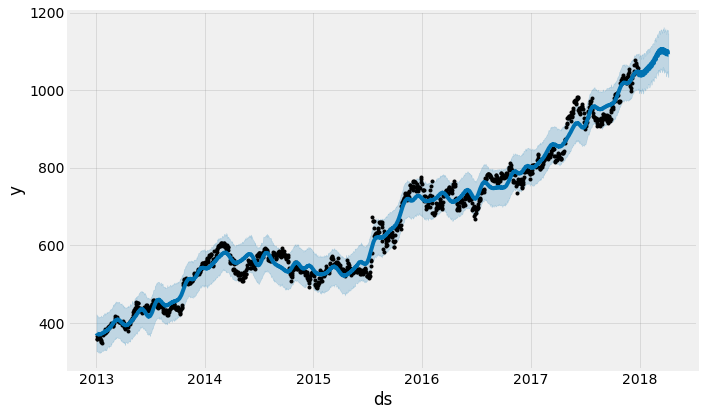

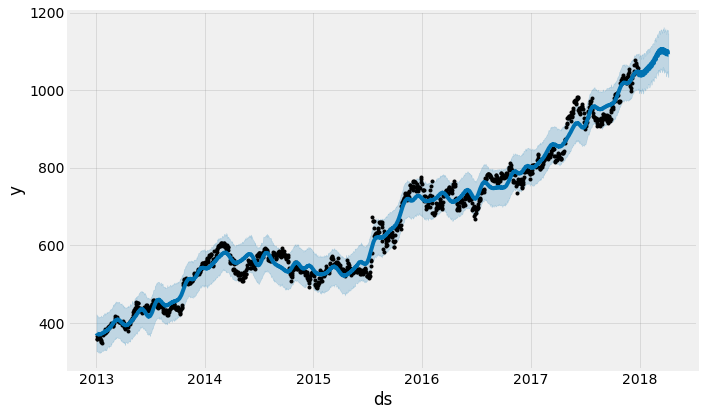

In [ ]:
m.plot(forecast)

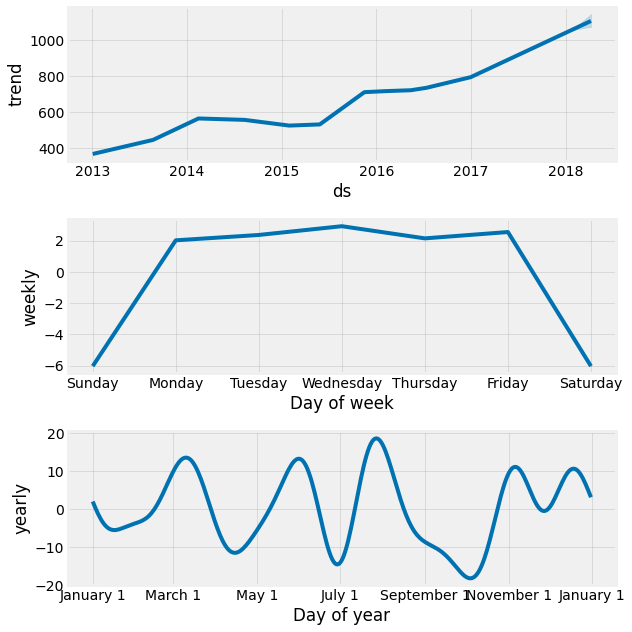

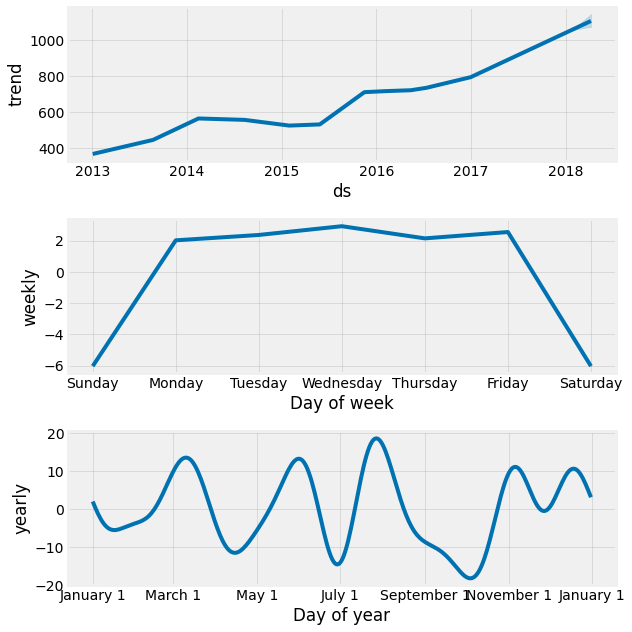

In [ ]:
m.plot_components(forecast)

In [ ]:
# Bayesian Optimization (tuning)

In [ ]:
! pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from bayes_opt import BayesianOptimization

In [ ]:
params = {'changepoint_prior_scale': [0.001, 0.5],
          'seasonality_prior_scale': [0.01, 10],
          'seasonality_mode': [0, 1]} 

In [ ]:
b = BayesSearchCV(Prophet(), 
    scoring='accuracy', 
    cv=5,
    verbose=3, 
    search_spaces=params,
    )  

In [ ]:
model = b.fit(df) 

TypeError: ignored